Loan Application Status Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import sklearn

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


This Dataset contains 614 rows and 13 columns.out of which 1 is target variable and remaining 12 are independent variables.

EDA(Exploratory Data Analysis)

In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

check the null values

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As we can see there are no null values present in this datase

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253

<Axes: >

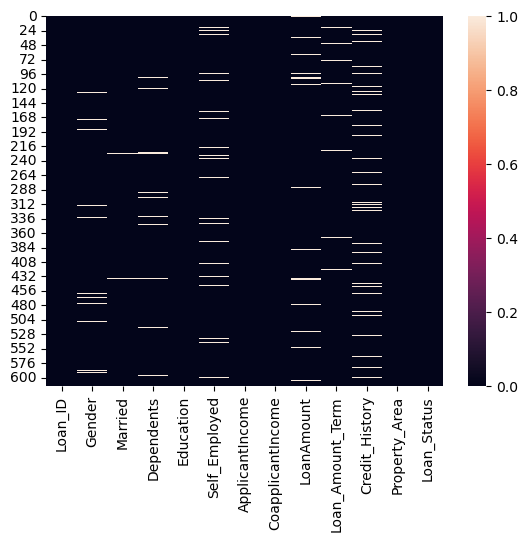

In [11]:
sns.heatmap(df.isnull())

In [ ]:
Encoding Technique.

In [13]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
        df

In [14]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,NaN,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


In [15]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [16]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
df['Gender']=df['Gender'].fillna(df['Gender'].mean())

In [18]:
df['Married']=df['Married'].fillna(df['Married'].mean())

In [19]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mean())

In [20]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mean())

In [21]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [22]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [23]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [24]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Here, we can see all the null values has been removed

<Axes: >

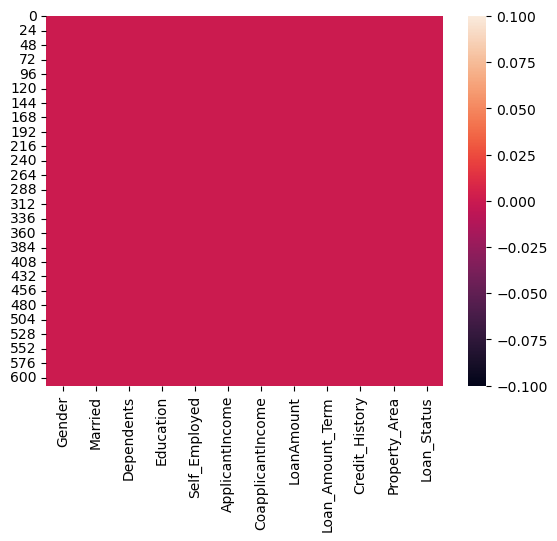

In [25]:
sns.heatmap(df.isnull())

As we can clearly visualize that there is no missing data present in the dataset.

In [26]:
df.nunique().to_frame('number of unique values')

,number of unique values
Gender,3
Married,3
Dependents,5
Education,2
Self_Employed,3
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Loan_Amount_Term,11
Credit_History,3


Description of dataset(it gives the statistical summary of numerical columns)

In [27]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.813644,0.651391,0.762938,0.218241,0.140893,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.385564,0.475752,1.002718,0.413389,0.339000,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


This is the Staststical information of the numerical columns.This summary of the dataset looks perfect.since there is no negative /invalid values present. here mean value is lesser than Median so there is left skewness present in the dataset. and 75% and Max values are same hence outliers are not present in the dataset.

Checking the counts of Targets

In [28]:
df['Loan_Status'].value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

Data Visualization

1.0    422
0.0    192
Name: Loan_Status, dtype: int64


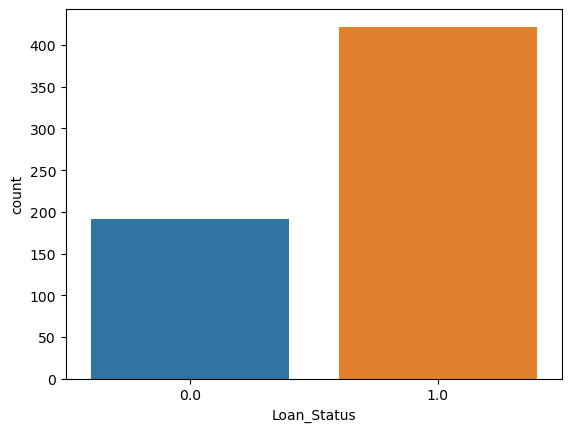

In [29]:
ux=sns.countplot(x='Loan_Status',data=df)
print(df['Loan_Status'].value_counts())
plt.show()

1.000000    489
0.000000    112
0.813644     13
Name: Gender, dtype: int64


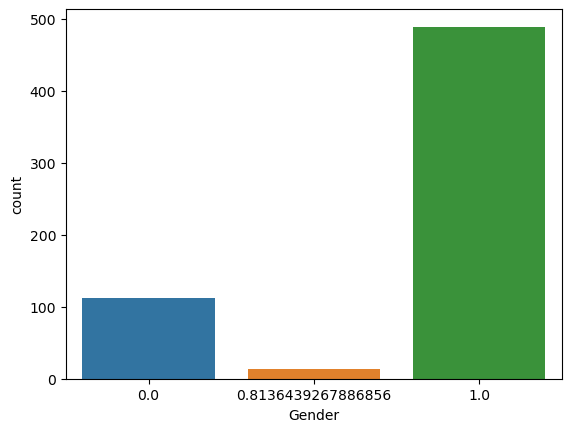

In [30]:
ux=sns.countplot(x='Gender',data=df)
print(df['Gender'].value_counts())
plt.show()

1.000000    398
0.000000    213
0.651391      3
Name: Married, dtype: int64


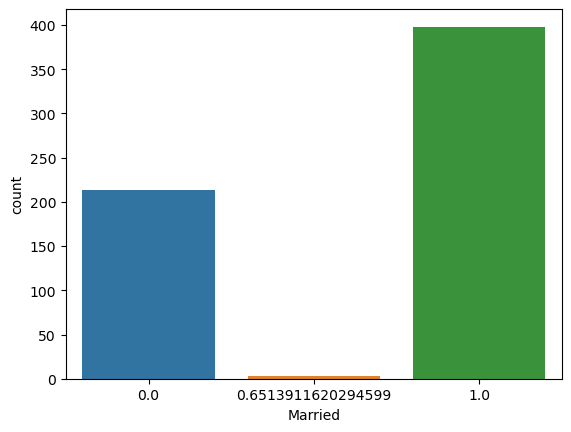

In [31]:
ux=sns.countplot(x='Married',data=df)
print(df['Married'].value_counts())
plt.show()

0.000000    345
1.000000    102
2.000000    101
3.000000     51
0.762938     15
Name: Dependents, dtype: int64


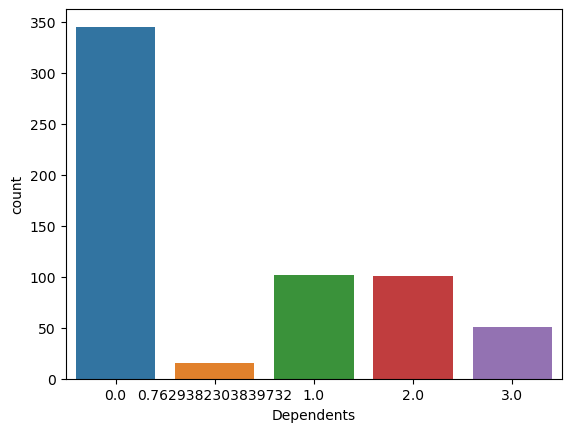

In [32]:
ux=sns.countplot(x='Dependents',data=df)
print(df['Dependents'].value_counts())
plt.show()

0.0    480
1.0    134
Name: Education, dtype: int64


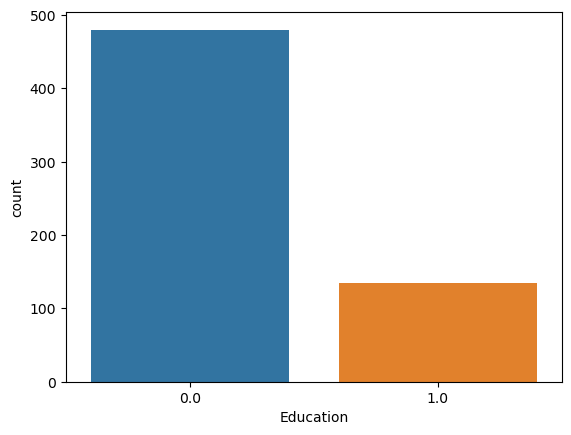

In [33]:
ux=sns.countplot(x='Education',data=df)
print(df['Education'].value_counts())
plt.show()

0.000000    500
1.000000     82
0.140893     32
Name: Self_Employed, dtype: int64


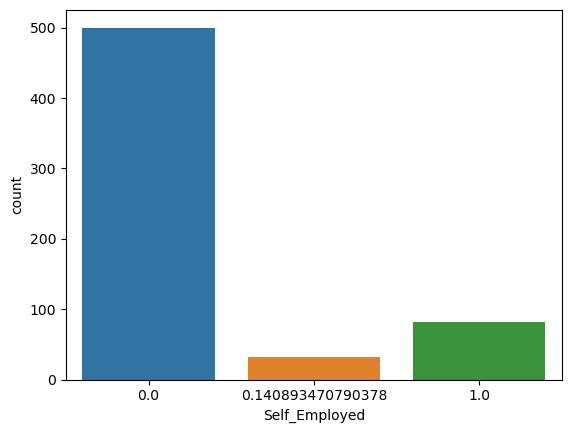

In [34]:
ux=sns.countplot(x='Self_Employed',data=df)
print(df['Self_Employed'].value_counts())
plt.show()

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


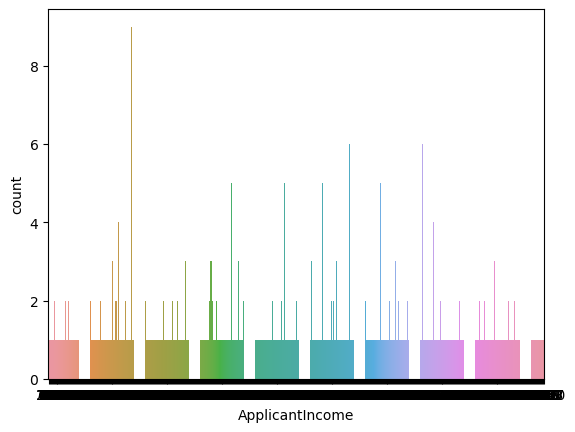

In [35]:
ux=sns.countplot(x='ApplicantIncome',data=df)
print(df['ApplicantIncome'].value_counts())
plt.show()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


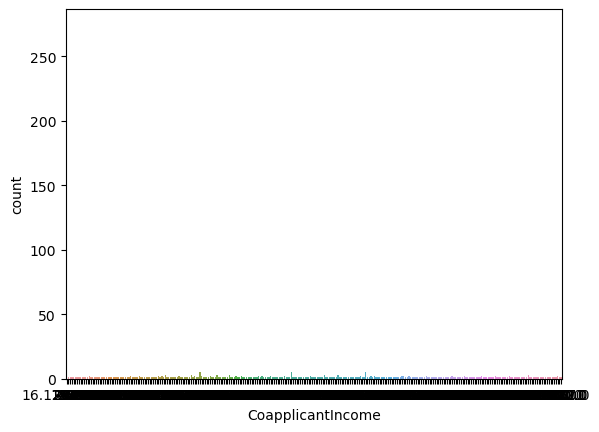

In [36]:
ux=sns.countplot(x='CoapplicantIncome',data=df)
print(df['CoapplicantIncome'].value_counts())
plt.show()

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


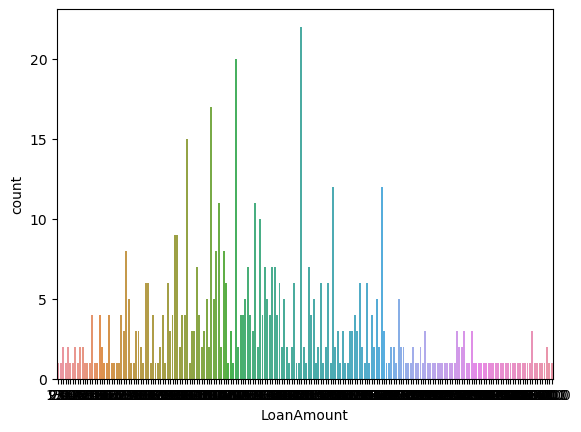

In [37]:
ux=sns.countplot(x='LoanAmount',data=df)
print(df['LoanAmount'].value_counts())
plt.show()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


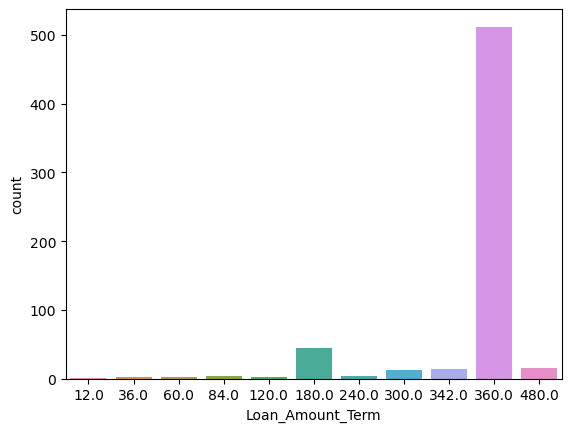

In [38]:
ux=sns.countplot(x='Loan_Amount_Term',data=df)
print(df['Loan_Amount_Term'].value_counts())
plt.show()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64


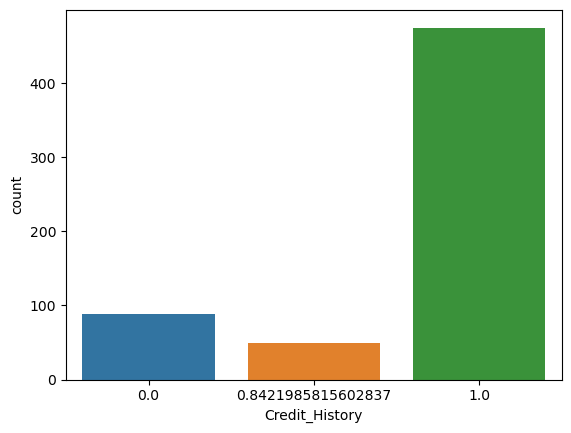

In [39]:
ux=sns.countplot(x='Credit_History',data=df)
print(df['Credit_History'].value_counts())
plt.show()

1.0    233
2.0    202
0.0    179
Name: Property_Area, dtype: int64


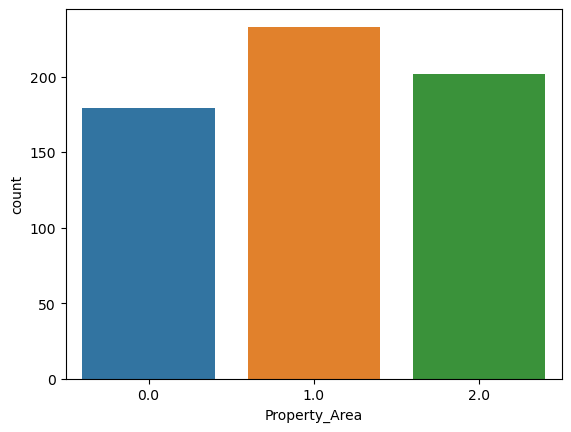

In [40]:
ux=sns.countplot(x='Property_Area',data=df)
print(df['Property_Area'].value_counts())
plt.show()

Here we are checking outliers in the data.

Gender                  Axes(0.125,0.653529;0.133621x0.226471)
Married              Axes(0.285345,0.653529;0.133621x0.226471)
Dependents            Axes(0.44569,0.653529;0.133621x0.226471)
Education            Axes(0.606034,0.653529;0.133621x0.226471)
Self_Employed        Axes(0.766379,0.653529;0.133621x0.226471)
ApplicantIncome         Axes(0.125,0.381765;0.133621x0.226471)
CoapplicantIncome    Axes(0.285345,0.381765;0.133621x0.226471)
LoanAmount            Axes(0.44569,0.381765;0.133621x0.226471)
Loan_Amount_Term     Axes(0.606034,0.381765;0.133621x0.226471)
Credit_History       Axes(0.766379,0.381765;0.133621x0.226471)
Property_Area               Axes(0.125,0.11;0.133621x0.226471)
Loan_Status              Axes(0.285345,0.11;0.133621x0.226471)
dtype: object

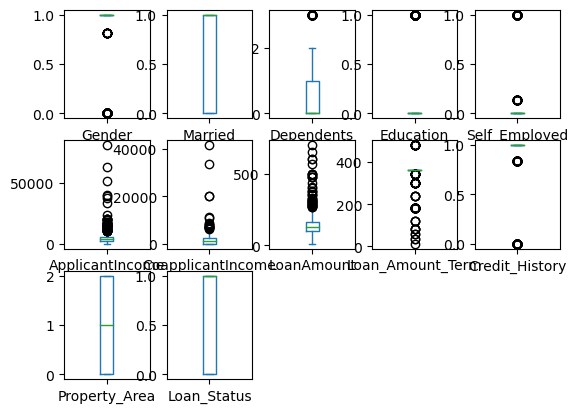

In [41]:
df.plot(kind='box',subplots=True,layout=(3,5))

As you can see outliers are present in this dataset to remove the outliers we use Zscore method to remove the outliers.

Checking Skewness

In [42]:
df.skew()

Gender              -1.632254
Married             -0.638509
Dependents           0.990764
Education            1.367622
Self_Employed        2.125544
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

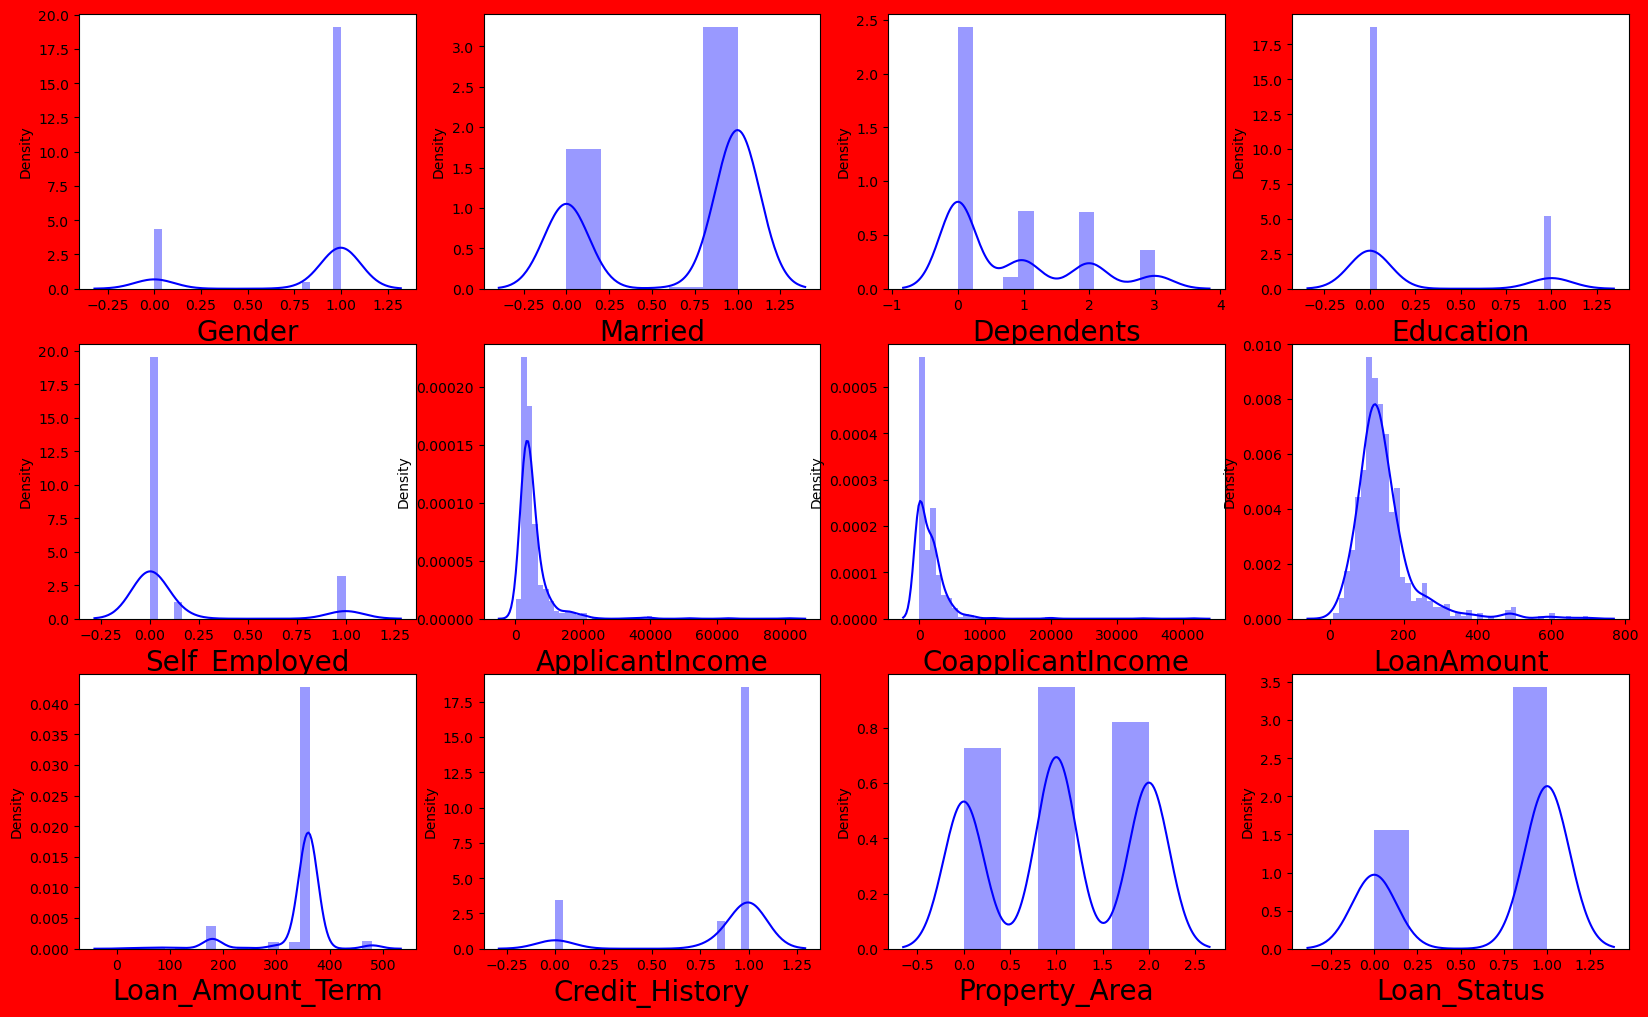

In [43]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=18:
        ax=plt.subplot(6,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()

In [44]:
df['Gender']=np.cbrt(df['Gender'])

In [45]:
df['Dependents']=np.cbrt(df['Dependents'])

In [46]:
df['Education']=np.cbrt(df['Education'])

In [47]:
df['Self_Employed']=np.cbrt(df['Self_Employed'])

In [48]:
df['ApplicantIncome']=np.cbrt(df['ApplicantIncome'])

In [49]:
df['CoapplicantIncome']=np.cbrt(df['CoapplicantIncome'])

In [50]:
df['LoanAmount']=np.cbrt(df['LoanAmount'])

In [51]:
df['Loan_Amount_Term']=np.cbrt(df['Loan_Amount_Term'])

In [52]:
df['Credit_History']=np.cbrt(df['Credit_History'])

In [53]:
df.skew()

Gender              -1.646513
Married             -0.638509
Dependents           0.367524
Education            1.367622
Self_Employed        1.838710
ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.832841
Loan_Amount_Term    -3.573315
Credit_History      -2.014285
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

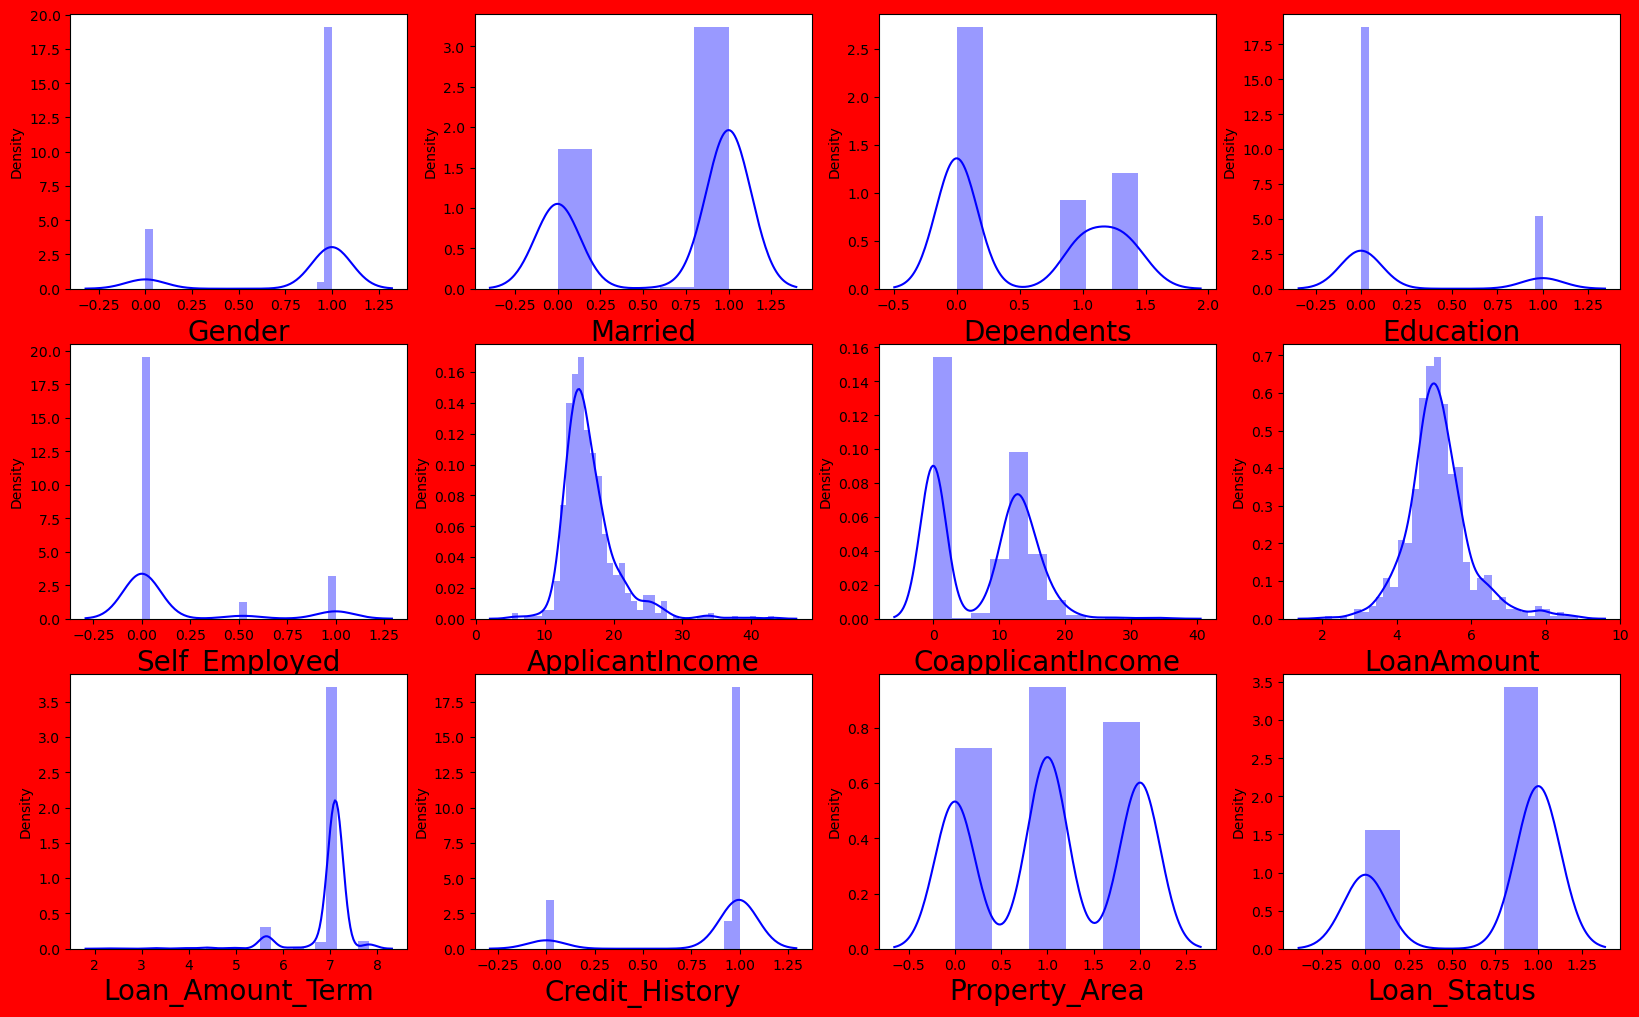

In [54]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=18:
        ax=plt.subplot(6,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()

In [57]:
df['ApplicantIncome']=np.sqrt(df['ApplicantIncome'])

In [61]:
df['Loan_Amount_Term']=np.cbrt(df['Loan_Amount_Term'])

In [59]:
df['Credit_History']=np.sqrt(df['Credit_History'])

In [62]:
df.skew()

Gender              -1.646513
Married             -0.638509
Dependents           0.367524
Education            1.367622
Self_Employed        1.838710
ApplicantIncome      1.292001
CoapplicantIncome    0.196726
LoanAmount           0.832841
Loan_Amount_Term    -4.586488
Credit_History      -2.019970
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

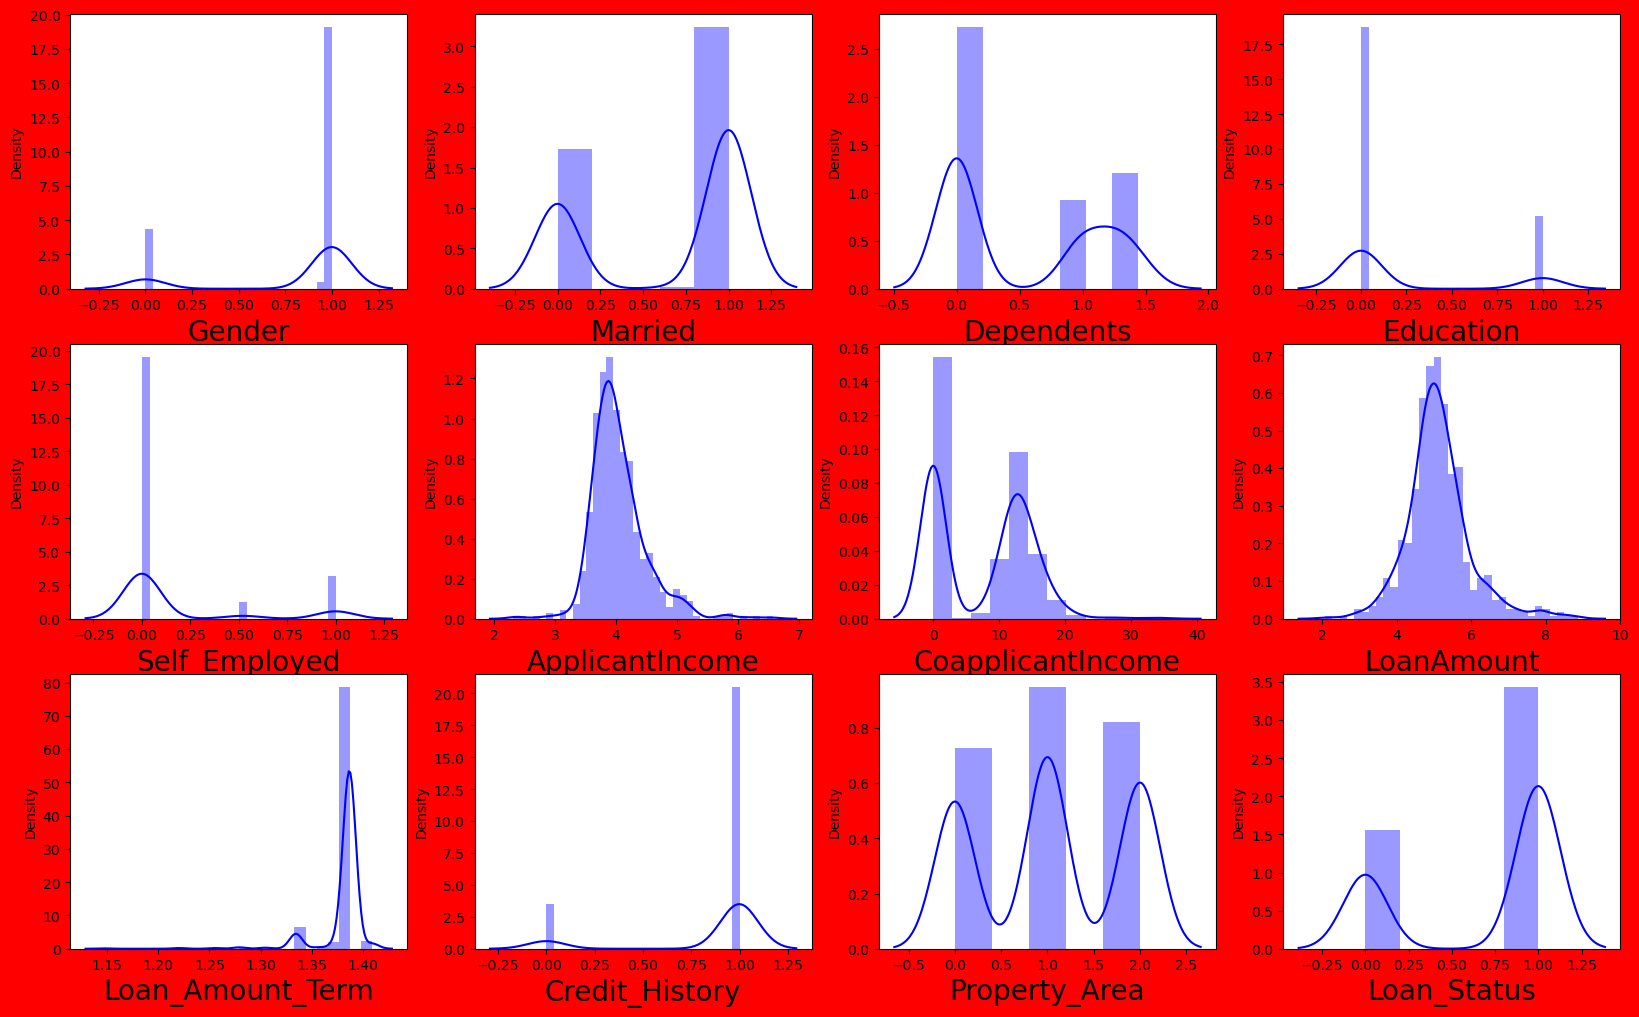

In [63]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=18:
        ax=plt.subplot(6,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()

As you can see outliers are present in this dataset to remove the outliers we use Zscore method to remove the outliers.

In [64]:
from scipy.stats import zscore
out_features=df[['Gender','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
z=np.abs(zscore(out_features))
z

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.476659,0.865571,0.528362,0.460284,0.454766,1.053225,0.169528,0.272238,0.419287
1,0.476659,0.813540,0.528362,0.460284,0.080203,0.561256,0.100752,0.272238,0.419287
2,0.476659,0.865571,0.528362,2.404501,0.535373,1.053225,1.269462,0.272238,0.419287
3,0.476659,0.865571,1.892641,0.460284,0.742605,0.820678,0.226303,0.272238,0.419287
4,0.476659,0.865571,0.528362,0.460284,0.494793,1.053225,0.092554,0.272238,0.419287
...,...,...,...,...,...,...,...,...,...
609,2.116459,0.865571,0.528362,0.460284,0.582769,1.053225,1.152903,0.272238,0.419287
610,0.476659,1.556127,0.528362,0.460284,0.083656,1.053225,1.996700,2.006885,0.419287
611,0.476659,0.813540,0.528362,0.460284,0.973356,0.178302,1.403404,0.272238,0.419287
612,0.476659,1.249977,0.528362,0.460284,0.870562,1.053225,0.693799,0.272238,0.419287


In [65]:
threshold=3
np.where(z>3)

(array([ 14,  68,  94, 130, 133, 155, 155, 171, 171, 177, 183, 185, 216,
        242, 262, 308, 313, 333, 333, 369, 409, 443, 468, 487, 495, 497,
        506, 523, 546, 561, 568, 575, 581, 585, 600, 604], dtype=int64),
 array([7, 7, 7, 6, 7, 4, 6, 4, 6, 6, 4, 4, 4, 7, 7, 6, 7, 4, 6, 6, 4, 4,
        4, 6, 7, 7, 6, 6, 7, 6, 6, 7, 5, 7, 5, 6], dtype=int64))

In [66]:
df1=df[(z<3).all(axis=1)]

In [67]:
df1.shape

(581, 12)

In [68]:
print('old dataframe:',df.shape[0])
print('new dataframe:',df1.shape[0])

old dataframe: 614
new dataframe: 581


In [69]:
print('datalosspercentage:',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

datalosspercentage: 5.374592833876222


As we can see there is less than 10% of data loss after removing the outliers so it is considerable.

Checking the Correlation b/w Target variable and Independent variable.

In [70]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.366060,0.161484,0.046676,-0.015665,0.078094,0.208574,0.133624,-0.055694,0.010733,-0.025258,0.018578
Married,0.366060,1.000000,0.359862,0.014214,-0.008777,0.026797,0.282721,0.173482,-0.071445,0.008556,0.002915,0.089180
Dependents,0.161484,0.359862,1.000000,0.049329,0.071520,0.124155,-0.002489,0.156964,-0.083502,-0.047814,0.045393,0.000199
Education,0.046676,0.014214,0.049329,1.000000,-0.015901,-0.183698,0.010615,-0.158991,-0.066357,-0.074500,-0.065243,-0.085884
Self_Employed,-0.015665,-0.008777,0.071520,-0.015901,1.000000,0.174025,-0.063553,0.118288,-0.027462,0.022856,-0.027601,0.001665
ApplicantIncome,0.078094,0.026797,0.124155,-0.183698,0.174025,1.000000,-0.341157,0.547284,-0.016080,0.013863,-0.027926,0.007326
CoapplicantIncome,0.208574,0.282721,-0.002489,0.010615,-0.063553,-0.341157,1.000000,0.158113,-0.000204,0.003606,-0.052318,0.033582
LoanAmount,0.133624,0.173482,0.156964,-0.158991,0.118288,0.547284,0.158113,1.000000,0.070854,-0.012559,-0.077644,-0.042714
Loan_Amount_Term,-0.055694,-0.071445,-0.083502,-0.066357,-0.027462,-0.016080,-0.000204,0.070854,1.000000,-0.010686,-0.083833,-0.007876
Credit_History,0.010733,0.008556,-0.047814,-0.074500,0.022856,0.013863,0.003606,-0.012559,-0.010686,1.000000,0.001281,0.541140


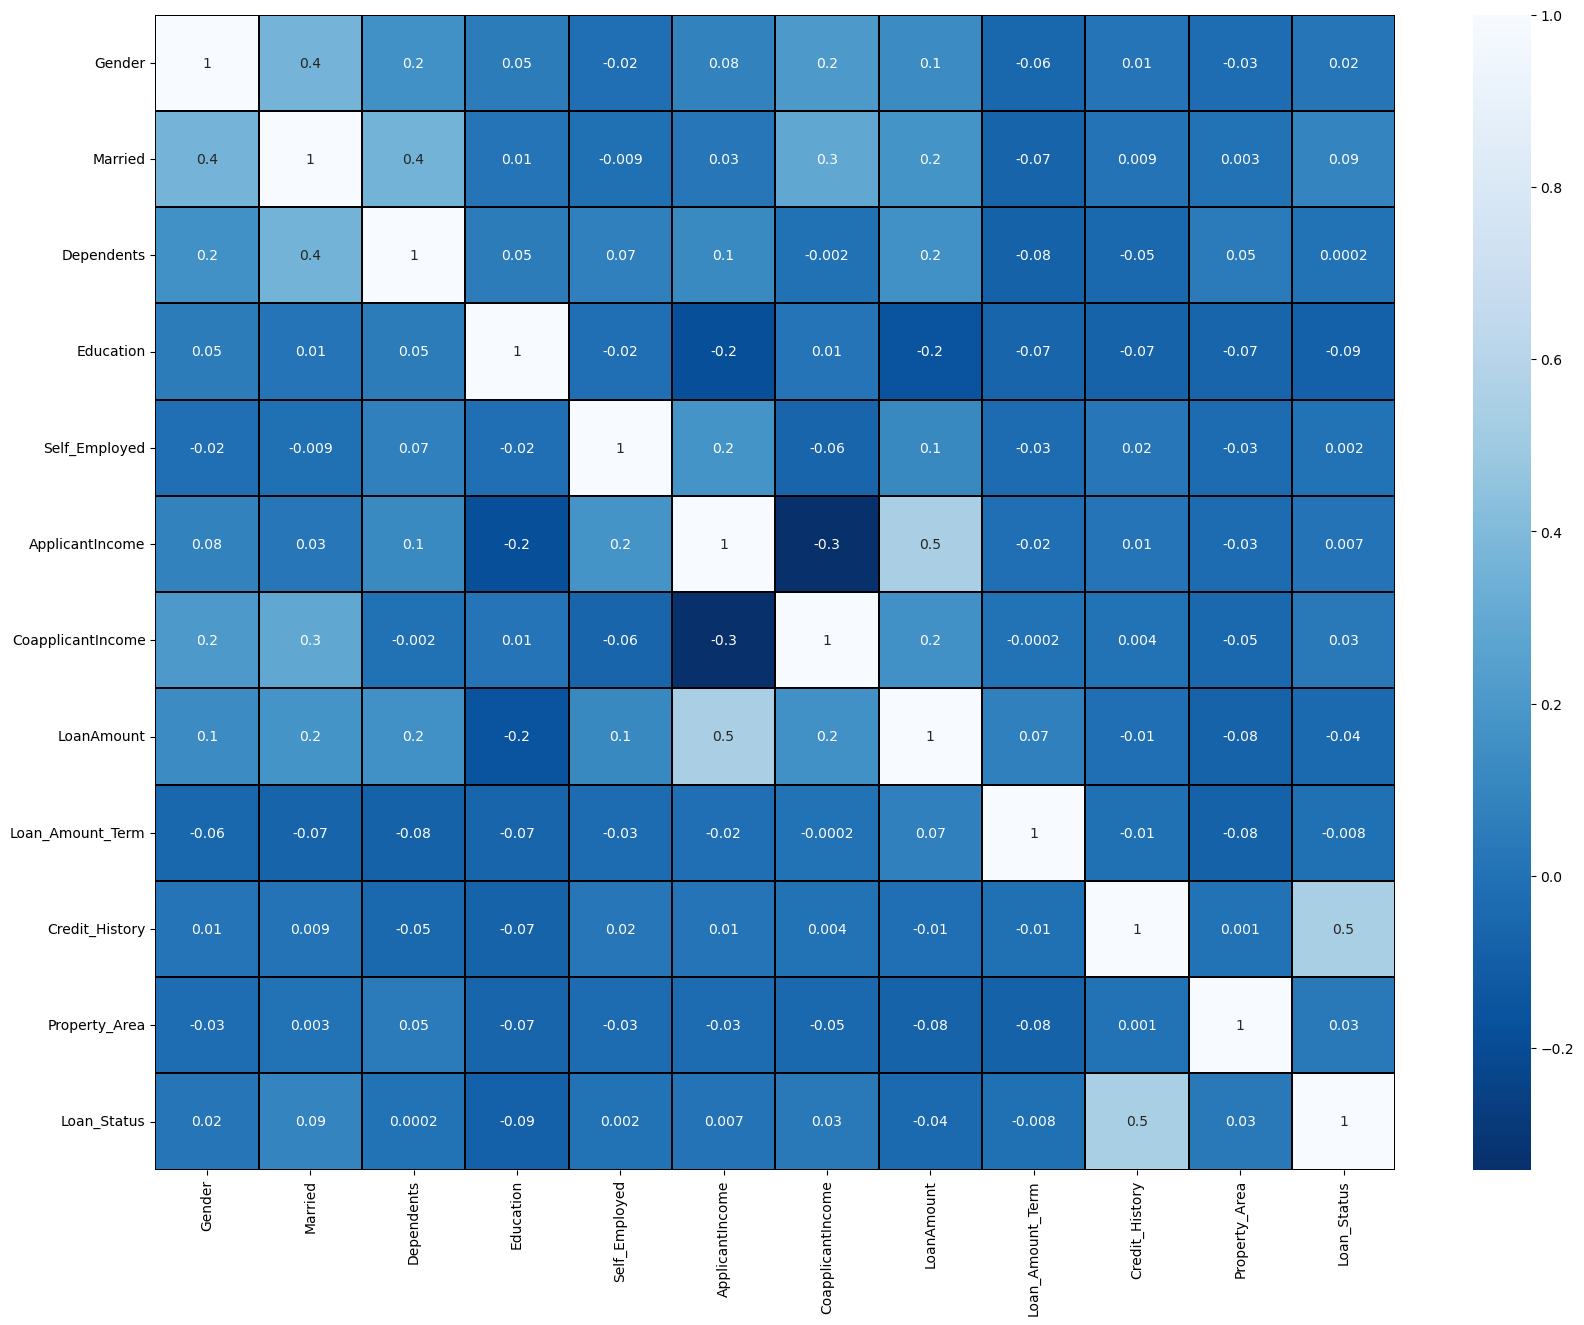

In [71]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()
                    

In [72]:
x=df1.drop(['Loan_Status'],axis=1)
y=df1['Loan_Status']

In [73]:
x.shape

(581, 11)

In [74]:
y.shape

(581,)

Feature scaling using StandardScaler method.

In [75]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)


In [76]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.473885,-1.362701,-0.852293,-0.536888,-0.450333,0.627425,-1.080490,0.272674,0.263819,0.423966,1.232358
1,0.473885,0.737632,0.834525,-0.536888,-0.450333,0.169137,0.581722,-0.049597,0.263819,0.423966,-1.306649
2,0.473885,0.737632,-0.852293,-0.536888,2.453908,-0.584035,-1.080490,-1.443120,0.263819,0.423966,1.232358
3,0.473885,0.737632,-0.852293,1.862587,-0.450333,-0.837589,0.848814,-0.199299,0.263819,0.423966,1.232358
4,0.473885,-1.362701,-0.852293,-0.536888,-0.450333,0.676399,-1.080490,0.180893,0.263819,0.423966,1.232358
...,...,...,...,...,...,...,...,...,...,...,...
576,-2.128522,-1.362701,-0.852293,-0.536888,-0.450333,-0.642026,-1.080490,-1.304140,0.263819,0.423966,-1.306649
577,0.473885,0.737632,1.580520,-0.536888,-0.450333,-0.031348,-1.080490,-2.310248,-3.416894,0.423966,-1.306649
578,0.473885,0.737632,0.834525,-0.536888,-0.450333,1.261932,-0.179701,1.743897,0.263819,0.423966,1.232358
579,0.473885,0.737632,1.272965,-0.536888,-0.450333,1.136162,-1.080490,0.897793,0.263819,0.423966,1.232358


In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,1.218254,Gender
1,1.421560,Married
2,1.204422,Dependents
3,1.074904,Education
4,1.047047,Self_Employed
5,1.923553,ApplicantIncome
6,1.608821,CoapplicantIncome
7,1.705206,LoanAmount
8,1.062195,Loan_Amount_Term
9,1.013210,Credit_History


As we can seee there is no multicorrelation present in the dataset so we can now ahead of model building

In [78]:
y.value_counts()

1.0    402
0.0    179
Name: Loan_Status, dtype: int64

Here we can see that data is not balanced since it is a classification problem we will balance the data using Oversampling method.

OverSampling here we use SMOTE method.

In [79]:
import sklearn
!pip install imbalanced_learn
from imblearn.over_sampling import SMOTE
smt=SMOTE()


In [80]:
trainx,trainy=smt.fit_resample(x,y)

In [81]:
trainx.value_counts()

Gender     Married    Dependents  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area
-2.128522  -1.362701  -0.852293   -0.536888  -0.450333      -2.910151         1.157990          -0.335848    1.833565          0.423966       -1.306649        1
 0.473885   0.737632  -0.059292   -0.536888   0.350441      -0.794337        -0.226199          -1.688072    0.263819          0.386523       -1.306649        1
                      -0.852293    1.862587   2.453908      -0.820818         1.109542           0.571658   -3.416894         -2.398592       -1.306649        1
                                                             0.070979         0.228226          -0.899068    0.263819          0.423966       -0.037146        1
                                                             0.213675        -1.080490          -0.692771   -0.013439          0.423966        1.232358        1
                                       

In [82]:
trainy.value_counts()

1.0    402
0.0    402
Name: Loan_Status, dtype: int64

In [83]:
trainy

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
799    0.0
800    0.0
801    0.0
802    0.0
803    0.0
Name: Loan_Status, Length: 804, dtype: float64

<Axes: ylabel='count'>

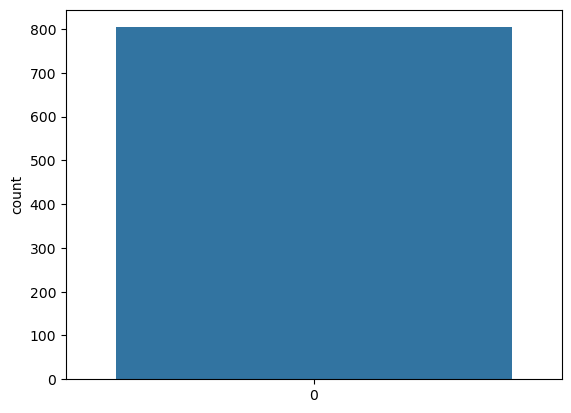

In [84]:
sns.countplot(trainy)

Model Bulding

As you can see this is Classification problem in this we have catgerocial data present so we use Classification model here

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=0)

In [87]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))

0.7885714285714286


In [88]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.8114285714285714
[[ 25  31]
 [  2 117]]
              precision    recall  f1-score   support

         0.0       0.93      0.45      0.60        56
         1.0       0.79      0.98      0.88       119

    accuracy                           0.81       175
   macro avg       0.86      0.71      0.74       175
weighted avg       0.83      0.81      0.79       175



In [89]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.7885714285714286
[[ 21  35]
 [  2 117]]
              precision    recall  f1-score   support

         0.0       0.91      0.38      0.53        56
         1.0       0.77      0.98      0.86       119

    accuracy                           0.79       175
   macro avg       0.84      0.68      0.70       175
weighted avg       0.82      0.79      0.76       175



In [90]:
ac=AdaBoostClassifier()
ac.fit(x_train,y_train)
predac=ac.predict(x_test)
print(accuracy_score(y_test,predac))
print(confusion_matrix(y_test,predac))
print(classification_report(y_test,predac))

0.7771428571428571
[[ 26  30]
 [  9 110]]
              precision    recall  f1-score   support

         0.0       0.74      0.46      0.57        56
         1.0       0.79      0.92      0.85       119

    accuracy                           0.78       175
   macro avg       0.76      0.69      0.71       175
weighted avg       0.77      0.78      0.76       175



In [91]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict(x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))


0.76
[[ 28  28]
 [ 14 105]]
              precision    recall  f1-score   support

         0.0       0.67      0.50      0.57        56
         1.0       0.79      0.88      0.83       119

    accuracy                           0.76       175
   macro avg       0.73      0.69      0.70       175
weighted avg       0.75      0.76      0.75       175



In [92]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
predet=et.predict(x_test)
print(accuracy_score(y_test,predet))
print(confusion_matrix(y_test,predet))
print(classification_report(y_test,predet))


0.7657142857142857
[[ 24  32]
 [  9 110]]
              precision    recall  f1-score   support

         0.0       0.73      0.43      0.54        56
         1.0       0.77      0.92      0.84       119

    accuracy                           0.77       175
   macro avg       0.75      0.68      0.69       175
weighted avg       0.76      0.77      0.75       175



In [93]:
from sklearn.tree import DecisionTreeClassifier
dc= DecisionTreeClassifier()
dc.fit(x_train,y_train)
preddc=dc.predict(x_test)
print(accuracy_score(y_test,preddc))
print(confusion_matrix(y_test,preddc))
print(classification_report(y_test,preddc))


0.6571428571428571
[[27 29]
 [31 88]]
              precision    recall  f1-score   support

         0.0       0.47      0.48      0.47        56
         1.0       0.75      0.74      0.75       119

    accuracy                           0.66       175
   macro avg       0.61      0.61      0.61       175
weighted avg       0.66      0.66      0.66       175



Now we can check cross valdiation of all the model.

In [94]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predRFC)-score.mean())

[0.78632479 0.79310345 0.77586207 0.81896552 0.82758621]
0.8003684055408193
difference b/w Accuracy_score and cross_val_score is: 0.01106016588775205


In [95]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predsvc)-score.mean())

[0.81196581 0.80172414 0.78448276 0.85344828 0.8362069 ]
0.8175655761862657
difference b/w Accuracy_score and cross_val_score is: -0.028994147614837096


In [96]:
score=cross_val_score(ac,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predac)-score.mean())

[0.74358974 0.76724138 0.74137931 0.82758621 0.82758621]
0.7814765694076039
difference b/w Accuracy_score and cross_val_score is: -0.00433371226474677


In [97]:
score=cross_val_score(bc,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predbc)-score.mean())

[0.73504274 0.75       0.76724138 0.76724138 0.81034483]
0.7659740642499263
difference b/w Accuracy_score and cross_val_score is: -0.005974064249926303


In [98]:
score=cross_val_score(et,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predet)-score.mean())

[0.78632479 0.76724138 0.78448276 0.78448276 0.78448276]
0.7814028882994399
difference b/w Accuracy_score and cross_val_score is: -0.015688602585154254


In [ ]:
As we can see above all model Accuracy_score and crossval_score is less and score mean is 81% in SVC() model so this is the best model.

Hyper parameter tunning

In [99]:
from sklearn.model_selection import  RandomizedSearchCV
param={'kernel':['rbf', 'linear']}
rscv= RandomizedSearchCV(SVC(),param,cv=5)
rscv.fit(x_train,y_train)
rscv.best_params_

{'kernel': 'rbf'}

In [100]:
model=SVC(kernel='rbf')
model.fit(x_train,y_train)
pred=model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

78.85714285714286


Plotting Roc and AUC curve

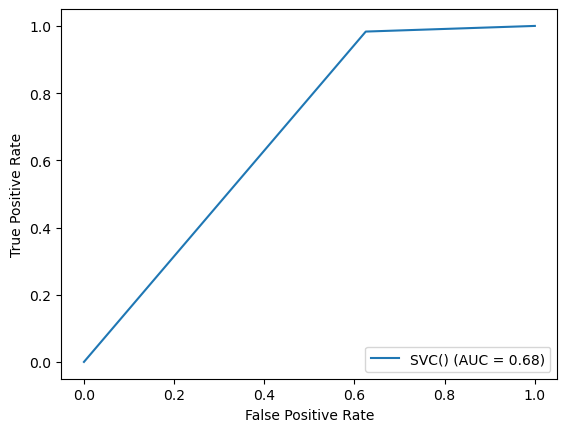

In [112]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds =roc_curve(y_test,pred,pos_label=1)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=model)
display.plot()

Save the model

In [114]:
import joblib
model=joblib.dump(model,'Loan Application Status Prediction')

In [115]:
import joblib
model=joblib.load('Loan Application Status Prediction')
prediction=model.predict(x_test)
prediction

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1.])

In [116]:
a=np.array(y_test)
df=pd.DataFrame()
df['prediction']=prediction
df['original']=a
df

,prediction,original
0,1.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,0.0
4,1.0,1.0
...,...,...
170,1.0,1.0
171,0.0,0.0
172,0.0,0.0
173,1.0,1.0
